# 🤖 Task 1: Extractive Summarizer

This notebook demonstrates an **extractive summarization technique** to generate concise summaries from longer documents. Key sentences are automatically selected and combined based on their **TF-IDF importance scores**.

**Workflow**
1. Preprocess the text  
2. Split into sentences  
3. Rank sentences using TF-IDF  
4. Select top sentences for the summary 
5. Visualize sentence importance

In [2]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize

# Download NLTK resources
nltk.download('punkt')

# --- Function Definitions ---

def summarize_text(text, top_n=2, visualize=True, color='skyblue'):
    """
    Perform extractive summarization on a given text using TF-IDF ranking.
    
    Parameters:
    - text: str, document to summarize
    - top_n: int, number of top sentences to extract
    - visualize: bool, whether to plot sentence importance
    - color: str, color of the plot bars
    
    Returns:
    - summary: str, concatenated top sentences
    """
    # Tokenize text into sentences
    sentences = sent_tokenize(text)
    
    # TF-IDF vectorization
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(sentences)
    
    # Compute sentence scores
    scores = tfidf_matrix.sum(axis=1).A1
    
    # Organize scores into DataFrame
    df = pd.DataFrame({'Sentence': sentences, 'Score': scores})
    df_sorted = df.sort_values(by='Score', ascending=False)
    
    # Extract top sentences
    summary = ' '.join(df_sorted.head(top_n)['Sentence'].tolist())
    
    # Visualization
    if visualize:
        plt.figure(figsize=(8, len(sentences)*0.5))
        plt.barh(df['Sentence'], df['Score'], color=color)
        plt.xlabel("TF-IDF Score")
        plt.title("Sentence Importance")
        plt.gca().invert_yaxis()
        plt.show()
    
    return summary

[nltk_data] Downloading package punkt to C:\Users\Pratham
[nltk_data]     Modi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Example 1: Basic Document Summarization

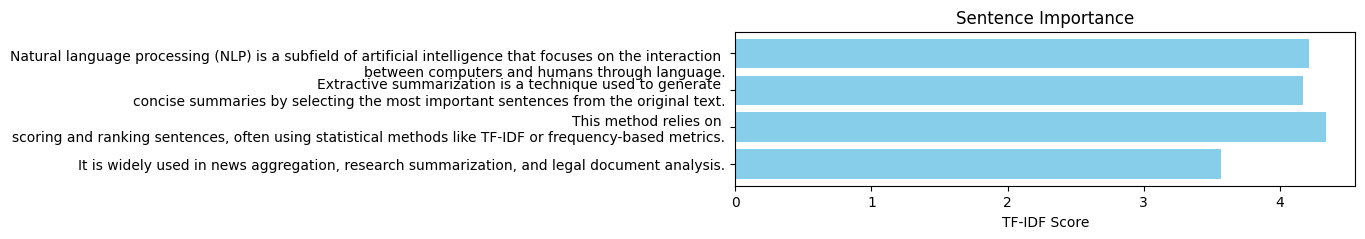

Summary:
 This method relies on 
scoring and ranking sentences, often using statistical methods like TF-IDF or frequency-based metrics. 
Natural language processing (NLP) is a subfield of artificial intelligence that focuses on the interaction 
between computers and humans through language.


In [3]:
text_example_1 = """
Natural language processing (NLP) is a subfield of artificial intelligence that focuses on the interaction 
between computers and humans through language. Extractive summarization is a technique used to generate 
concise summaries by selecting the most important sentences from the original text. This method relies on 
scoring and ranking sentences, often using statistical methods like TF-IDF or frequency-based metrics. 
It is widely used in news aggregation, research summarization, and legal document analysis.
"""

# Generate summary
summary_1 = summarize_text(text_example_1, top_n=2, visualize=True)
print("Summary:\n", summary_1)

### Example 2: Machine Learning Text

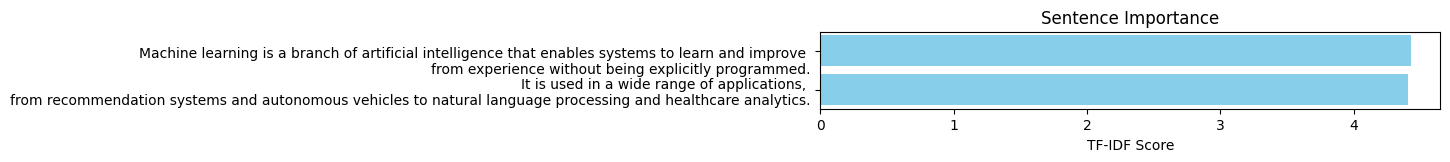

Summary:
 
Machine learning is a branch of artificial intelligence that enables systems to learn and improve 
from experience without being explicitly programmed. It is used in a wide range of applications, 
from recommendation systems and autonomous vehicles to natural language processing and healthcare analytics.


In [6]:
text_example_2 = """
Machine learning is a branch of artificial intelligence that enables systems to learn and improve 
from experience without being explicitly programmed. It is used in a wide range of applications, 
from recommendation systems and autonomous vehicles to natural language processing and healthcare analytics.
"""

summary_2 = summarize_text(text_example_2, top_n=2, visualize=True)
print("Summary:\n", summary_2)

### Example 3: Climate Change Text

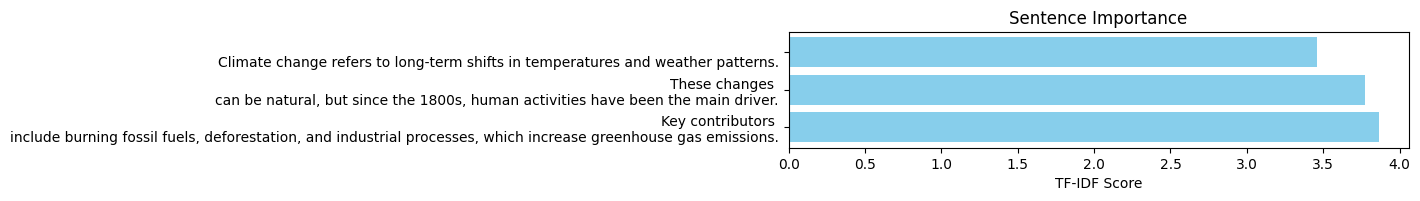

Summary:
 Key contributors 
include burning fossil fuels, deforestation, and industrial processes, which increase greenhouse gas emissions. These changes 
can be natural, but since the 1800s, human activities have been the main driver.


In [7]:
text_example_3 = """
Climate change refers to long-term shifts in temperatures and weather patterns. These changes 
can be natural, but since the 1800s, human activities have been the main driver. Key contributors 
include burning fossil fuels, deforestation, and industrial processes, which increase greenhouse gas emissions.
"""

summary_3 = summarize_text(text_example_3, top_n=2, visualize=True)
print("Summary:\n", summary_3)


## Summary and Observations

- The extractive summarizer successfully identifies the most important sentences from each text.  
- Visualization of sentence importance helps understand which sentences contribute most to the summary.  
- This approach can be applied to longer documents, research papers, or news articles for quick summarization.  
- Further improvements could include more advanced scoring methods, e.g., using embeddings or graph-based ranking.

In [8]:
# Display all summaries together 
clean_summaries = [s.replace('\n', ' ') for s in [summary_1, summary_2, summary_3]]

df_summaries = pd.DataFrame({
    'Example': ['Example 1', 'Example 2', 'Example 3'],
    'Summary': clean_summaries
})

df_summaries

,Example,Summary
0,Example 1,This method relies on scoring and ranking sen...
1,Example 2,Machine learning is a branch of artificial in...
2,Example 3,Key contributors include burning fossil fuels...
